# Air quality

### Here we read in data from the Department of Natural Resources and Environmental Control (DNREC) Air Quality Monitoring Network and make some basic plots.

#### <a href="https://data.delaware.gov/Energy-and-Environment/Air-Quality-Monitoring-Network/b6hy-ss9q">Dataset access from Delaware Open Data</a>

#### <a href="https://airmonitoring.dnrec.delaware.gov/">Map of monitoring stations</a>  with description and photograph of each site

<p>The raw dataset has lots of missing measurements from when sensors were not functioning. Sometimes these are labeled <tt>NoData</tt> or <tt>Down</tt> in the <tt>STT_DataStatusCodeText</tt> column of the <tt>csv</tt> file you download from the web. In other places, invalid data is marked by -9999 in the <tt>ParamValue</tt> column. I downloaded the dataset on Tuesday, May 5 and used the <tt>UNIX</tt> shell to remove invalid values:<br />
    <tt>$ cat Air_Quality.csv | grep -v NoData | grep -v Down | grep -v "\-9999" > Air_Quality_valid.csv</tt></p>
This cuts the size of the <tt>.csv</tt> file by a third. If you want to download a more recent version of the dataset, I suggest trimming the invalid values before you load it into <tt>python</tt>.

#### Set up <tt>python</tt> environment and read in the data using <tt>pandas</tt>:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size" : 16}) # Make readable plots

airdata = pd.read_csv('Air_Quality_valid.csv', parse_dates=['Date_Time'], \
                      engine='c')

#### Examine the first few rows of the <tt>pandas DataFrame</tt>:

In [2]:
airdata.head()

,Date_Time,CountyCode,STA_StationName,MOT_AIR_ParamCode,MOT_MonitorName,ParamValue,STT_DataStatusCodeText
0,2010-11-15 17:00:00,3,Martin Luther King,42401,SO2 Trace Level,0.006407,_
1,2010-11-15 17:00:00,3,Martin Luther King,42101,CO Trace Level,0.435146,_
2,2010-11-15 17:00:00,3,Martin Luther King,62101,Temp,12.394440,_
3,2010-11-15 17:00:00,3,Martin Luther King,42603,NOX,0.000000,RS232
4,2010-11-15 17:00:00,3,Martin Luther King,44201,Ozone,0.001832,_


<p>To do a rigorous analysis, we might have to dig into the meaning of the <tt>STT_DataStatusCodeText</tt> field more thoroughly. What is RS232 telling us? Should we believe the NOX concentration of zero reported on 2010-11-15?</p> 

#### What are the names of the monitoring stations?

In [3]:
print(airdata['STA_StationName'].unique())

['Martin Luther King' 'Brandywine Creek State Park' 'Bellefonte II'
 'Lums Pond State Park' 'Rt #9-Delaware City' 'Killens Pond' 'Seaford'
 'Lewes']


#### What are the stations measuring?

<p>Note: each station measures a subset of the quantities listed below.</p>

In [4]:
print('Available measurements:', airdata['MOT_MonitorName'].unique())

Available measurements: ['SO2 Trace Level' 'CO Trace Level' 'Temp' 'NOX' 'Ozone' 'NO2'
 'Wind Speed V' 'Wind Dir V' 'NOY' 'RH' 'BC' 'PM2.5 Sharp Colo'
 'SO2-Max5min' 'PM2.5 5030i IN' 'AQS Temp Deg C' 'PM 2.5 TAPI' 'CO']


#### Select and plot SO$_2$ trace values measured at the Lewes station

Text(0.5, 1.0, 'Lewes')

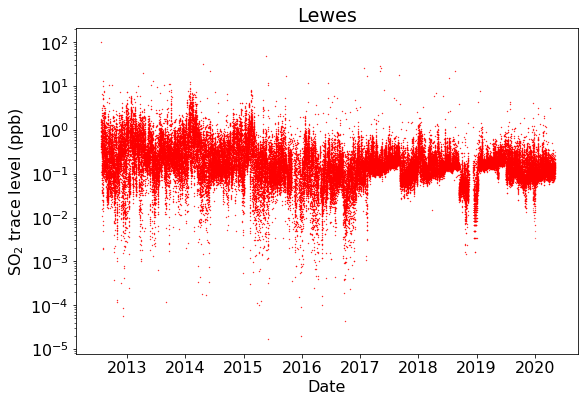

In [5]:
Lewes_SO2 = airdata[(airdata['STA_StationName'] == 'Lewes') & \
                    (airdata['MOT_MonitorName'] == 'SO2 Trace Level')]

plt.figure(figsize=(9,6))
plt.semilogy(Lewes_SO2['Date_Time'], Lewes_SO2['ParamValue'], 'r.', markersize=0.5)
plt.xlabel('Date')
plt.ylabel(r"SO$_2$ trace level (ppb)")
plt.title('Lewes')

#### Select and plot ozone concentrations measured at the Brandywine Creek State Park station

Text(0.5, 1.0, 'Brandywine Creek State Park')

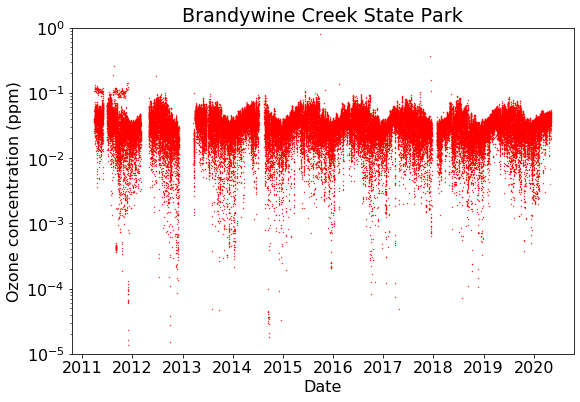

In [6]:
Brandywine_ozone = airdata[(airdata['STA_StationName'] == 'Brandywine Creek State Park') & \
                    (airdata['MOT_MonitorName'] == 'Ozone')]

plt.figure(figsize=(9,6))
plt.semilogy(Brandywine_ozone['Date_Time'], Brandywine_ozone['ParamValue'], 'r.', markersize=0.5)
plt.ylim([1e-5,1])
plt.xlabel('Date')
plt.ylabel('Ozone concentration (ppm)')
plt.title('Brandywine Creek State Park')